# Proyecto 1 - S&P500 - Data science 
Este proyecto tiene como objetivo realizar un análisis exploratorio de datos (EDA) sobre las 500 empresas que componen el índice S&P 500. Utilizando un conjunto de datos estructurado, analizaremos diferentes métricas principalemnte usando el Marketcap y vinedo su relacion con el crecimiento de ingresos, la cantidad de empleados, entre otros, para responder preguntas específicas que nos ayudarán a entender la distribución, relevancia y características clave de estas empresas y diferentes grupos.

In [2]:
#Importamos pandas y el csv del S&P500
import pandas as pd
df = pd.read_csv('./sp500_companies copy.csv')
df.shape
df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


### Pregunta 1: ¿Cuántas empresas hay por sector, considerando solo aquellas con un Marketcap mayor a 10 mil millones y un crecimiento de ingresos positivo?
**Explicación:** Filtramos el conjunto de datos para incluir solo empresas que cumplan las condiciones (Marketcap > 10 mil millones y Revenuegrowth > 0) y contamos el número de empresas en cada sector. Luego mostrarlo en un grafico de barras.

Sector
Technology                65
Healthcare                53
Financial Services        52
Industrials               52
Consumer Cyclical         38
Real Estate               25
Utilities                 24
Consumer Defensive        18
Communication Services    15
Basic Materials           10
Energy                     9
Name: count, dtype: int64


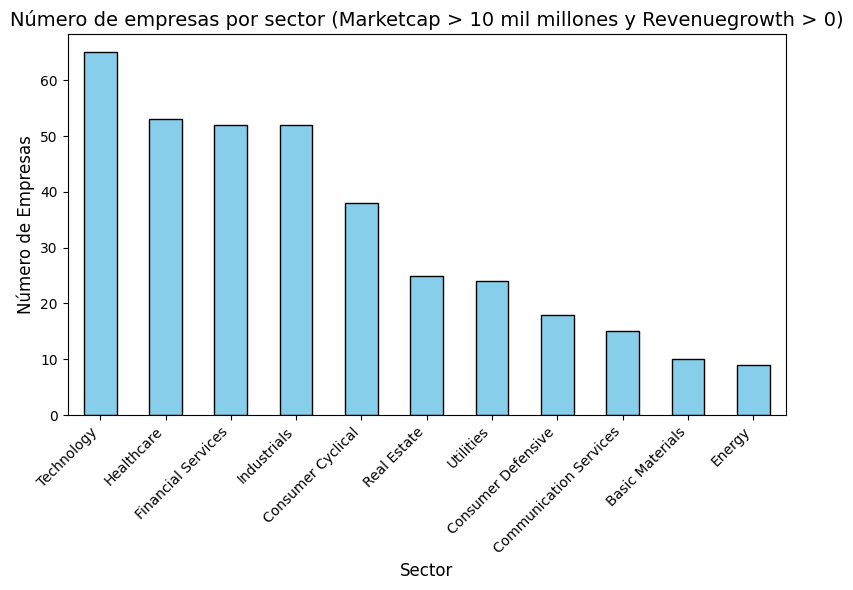

In [47]:
import matplotlib.pyplot as plt

# Filtrar empresas con Marketcap > 10 mil millones y Revenuegrowth > 0
filtered_df = df[(df['Marketcap'] > 1e10) & (df['Revenuegrowth'] > 0)]
sector_counts = filtered_df['Sector'].value_counts()

# Imprimir conteos por sector
print(sector_counts)

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sector_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de empresas por sector (Marketcap > 10 mil millones y Revenuegrowth > 0)', fontsize=14)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Número de Empresas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Pregunta 2: ¿Cuántas empresas tienen un Marketcap mayor a 100 mil millones, están en el sector tecnológico y tienen más de 10,000 empleados?
**Explicación:** Aplicamos múltiples condiciones para filtrar empresas por Marketcap, Sector y número de empleados (Fulltimeemployees > 10,000), y calculamos el total de empresas que cumplen todos los criterios. luego ordenar las empresas resultantes por la columna Marketcap en orden descendente. columnas relevantes (Longname, Marketcap y Fulltimeemployees)

In [14]:
# Filtrar empresas con Marketcap > 100 mil millones, sector tecnológico y más de 10,000 empleados
tech_large_employees = df[(df['Marketcap'] > 1e11) & 
                          (df['Sector'] == 'Technology') & 
                          (df['Fulltimeemployees'] > 10000)]

# Ordenar las empresas filtradas de mayor a menor Marketcap
tech_large_employees_sorted = tech_large_employees.sort_values(by='Marketcap', ascending=False)

# Mostrar el número de empresas y el DataFrame ordenado
print(f"Empresas tecnológicas con Marketcap > 100 mil millones y más de 10,000 empleados: {len(tech_large_employees_sorted)}")
print(tech_large_employees_sorted[['Longname', 'Marketcap', 'Fulltimeemployees']])


Empresas tecnológicas con Marketcap > 100 mil millones y más de 10,000 empleados: 22
                                       Longname      Marketcap  \
0                                    Apple Inc.  3846819807232   
1                            NVIDIA Corporation  3298803056640   
2                         Microsoft Corporation  3246068596736   
8                                 Broadcom Inc.  1031217348608   
15                           Oracle Corporation   474532249600   
24                             Salesforce, Inc.   328873050112   
31                          Cisco Systems, Inc.   233071116288   
32                                Accenture plc   229157109760   
33                             ServiceNow, Inc.   225143422976   
38  International Business Machines Corporation   206528708608   
44                                   Adobe Inc.   196844240896   
45                 Advanced Micro Devices, Inc.   193455177728   
50                                  Intuit Inc.   1800957

### Pregunta 3: ¿Cuál es la distribución del Marketcap en histograma, segmentado por sector y rango de empleados (menos o más de 10,000 empleados)?
**Explicación:** Creamos histogramas de la columna Marketcap, divididos en sectores y además segmentados por si las empresas tienen menos o más de 10,000 empleados.

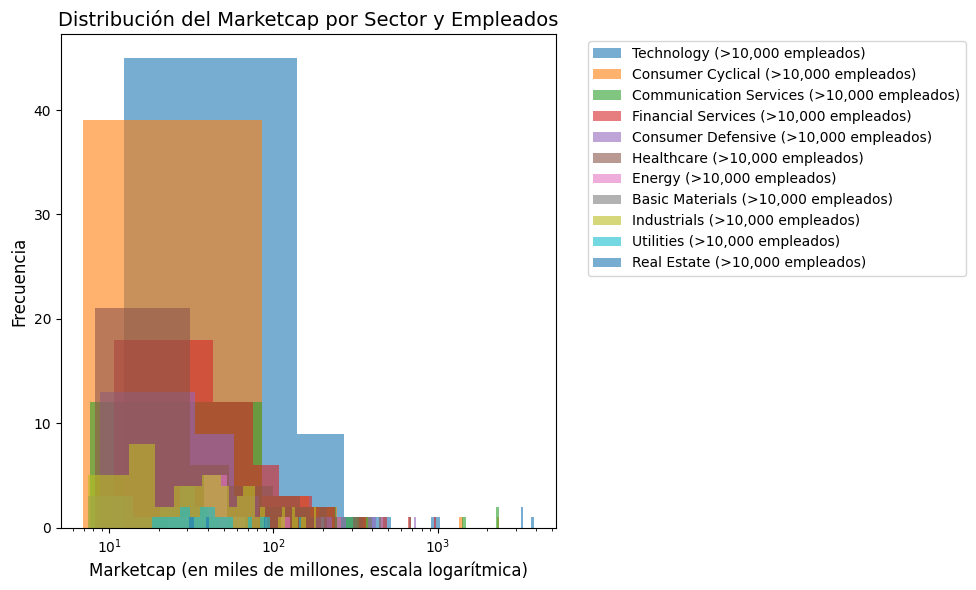

/var/folders/yn/vbht61m97rg6wrrbgs95_9k00000gn/T/ipykernel_78845/2233245573.py:41: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  stacked_data = filtered_df.pivot_table(


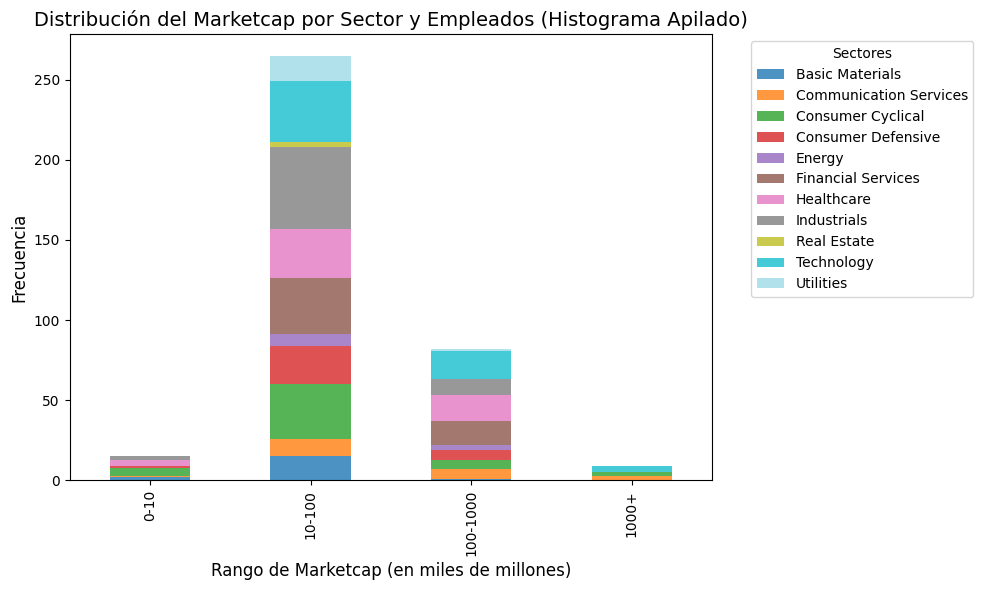

In [20]:
import matplotlib.pyplot as plt

# Tamaño del gráfico
plt.figure(figsize=(10, 6))

# Segmentar por sector y rango de empleados
sectors = df['Sector'].unique()
for sector in sectors:
    subset = df[(df['Sector'] == sector) & (df['Fulltimeemployees'] > 10000)]
    plt.hist(subset['Marketcap'] / 1e9, bins=30, alpha=0.6, label=f"{sector} (>10,000 empleados)")

# Escala logarítmica en el eje x
plt.xscale('log')

# Etiquetas y título
plt.title('Distribución del Marketcap por Sector y Empleados', fontsize=14)
plt.xlabel('Marketcap (en miles de millones, escala logarítmica)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mejorar la leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



#un grafico mas entendible:
import matplotlib.pyplot as plt

# Crear un DataFrame vacío para almacenar los valores de Marketcap por rango y sector
bins = [0, 10, 100, 1000, 10000]  # Definir los rangos del Marketcap (en miles de millones)
labels = ['0-10', '10-100', '100-1000', '1000+']
df['Marketcap_Binned'] = pd.cut(df['Marketcap'] / 1e9, bins=bins, labels=labels, right=False)

# Filtrar empresas con más de 10,000 empleados
filtered_df = df[df['Fulltimeemployees'] > 10000]

# Crear una tabla de frecuencias: filas = sectores, columnas = rangos de Marketcap
stacked_data = filtered_df.pivot_table(
    index='Sector',
    columns='Marketcap_Binned',
    aggfunc='size',
    fill_value=0
)

# Generar el histograma apilado
stacked_data.T.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8, colormap='tab20')

# Personalizar etiquetas y título
plt.title('Distribución del Marketcap por Sector y Empleados (Histograma Apilado)', fontsize=14)
plt.xlabel('Rango de Marketcap (en miles de millones)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Sectores', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Pregunta 4: ¿Cuáles son las 10 empresas con mayor Marketcap, mostrando también su sector, crecimiento de ingresos y su porcentaje de contribución al Marketcap total?(suma total)
**Explicación:** Seleccionamos las 10 empresas más grandes según el Marketcap, y mostramos información adicional como el porcentaje que cada empresa aporta al Marketcap total. y ver la usma total de la contribución de las top10.

In [24]:
# Calcular el porcentaje de contribución al Marketcap total
df['Marketcap_Percentage'] = (df['Marketcap'] / df['Marketcap'].sum()) * 100

# Seleccionar las 10 empresas con mayor Marketcap
top_companies = df.sort_values(by='Marketcap', ascending=False).head(10)

# Imprimir las 10 empresas con sus contribuciones
print(top_companies[['Longname', 'Sector', 'Revenuegrowth', 'Marketcap', 'Marketcap_Percentage']])

# Calcular la suma del porcentaje de contribución al Marketcap de estas 10 empresas
total_contribution = top_companies['Marketcap_Percentage'].sum()
print(f"Suma del porcentaje de contribución al Marketcap total de estas 10 empresas: {total_contribution:.2f}%")


                  Longname                  Sector  Revenuegrowth  \
0               Apple Inc.              Technology          0.061   
1       NVIDIA Corporation              Technology          1.224   
2    Microsoft Corporation              Technology          0.160   
3         Amazon.com, Inc.       Consumer Cyclical          0.110   
4            Alphabet Inc.  Communication Services          0.151   
5            Alphabet Inc.  Communication Services          0.151   
6     Meta Platforms, Inc.  Communication Services          0.189   
7              Tesla, Inc.       Consumer Cyclical          0.078   
8            Broadcom Inc.              Technology          0.164   
9  Berkshire Hathaway Inc.      Financial Services         -0.002   

       Marketcap  Marketcap_Percentage  
0  3846819807232              6.920915  
1  3298803056640              5.934964  
2  3246068596736              5.840088  
3  2365033807872              4.254995  
4  2351625142272              4.230


### Pregunta 5: ¿Qué sector tiene el mayor Marketcap total, cuántas empresas están en él, y cuál es el crecimiento de ingresos promedio de ese sector?
**Explicación:** Calculamos el Marketcap total y el promedio de crecimiento de ingresos (Revenuegrowth) por sector, identificando el sector con el mayor Marketcap total y las empresas que lo conforman.

In [26]:
# Calcular el Marketcap total y crecimiento promedio por sector
sector_stats = df.groupby('Sector').agg(
    Marketcap_Total=('Marketcap', 'sum'),
    Revenuegrowth_Avg=('Revenuegrowth', 'mean'),
    Company_Count=('Sector', 'size')
).sort_values(by='Marketcap_Total', ascending=False)

top_sector = sector_stats.iloc[0]
print(f"El sector con mayor Marketcap total es:\n{top_sector}")


El sector con mayor Marketcap total es:
Marketcap_Total      1.728701e+13
Revenuegrowth_Avg    1.158272e-01
Company_Count        8.200000e+01
Name: Technology, dtype: float64


### Pregunta 6: ¿Qué porcentaje de empresas en el sector "Financial Services" tienen un Marketcap superior a 100 mil millones?
**Explicación:** Analizamos el sector "Financial Services" y calculamos el porcentaje de empresas que tienen un Marketcap mayor a 100 mil millones. Esto nos da una idea de la proporción de empresas grandes dentro de este sector específico. Además, mostramos una lista de las empresas que cumplen esta condición, incluyendo su nombre, país y valor de Marketcap.

In [39]:
# Filtrar empresas del sector "Financial Services" con Marketcap > 10 mil millones
large_financials = df[(df['Sector'] == 'Financial Services') & (df['Marketcap'] > 1e11)]

# Total de empresas en el sector "Financial Services"
total_financials = len(df[df['Sector'] == 'Financial Services'])

# Calcular el porcentaje de empresas financieras con Marketcap > 10 mil millones
percentage_large_financials = (len(large_financials) / total_financials) * 100 if total_financials > 0 else 0

# Imprimir resultados
print(f"Porcentaje de empresas en el sector 'Financial Services' con Marketcap > 10 mil millones: {percentage_large_financials:.2f}%")

# Mostrar las empresas que cumplen la condición
print(large_financials[['Longname', 'Country', 'Marketcap']])


Porcentaje de empresas en el sector 'Financial Services' con Marketcap > 10 mil millones: 26.87%
                            Longname        Country     Marketcap
9            Berkshire Hathaway Inc.  United States  978776031232
12              JPMorgan Chase & Co.  United States  668924837888
13                         Visa Inc.  United States  615235846144
14           Mastercard Incorporated  United States  484642324480
23       Bank of America Corporation  United States  338911100928
30             Wells Fargo & Company  United States  234196303872
34          American Express Company  United States  210382487552
37                   Blackstone Inc.  United States  207208415232
42                    Morgan Stanley  United States  198866780160
51     The Goldman Sachs Group, Inc.  United States  177704452096
59                   BlackRock, Inc.  United States  159322472448
61                   S&P Global Inc.  United States  152608636928
68       The Progressive Corporation  United 

### Pregunta 7: ¿Cómo varía el Marketcap promedio por sector para empresas con ingresos crecientes y más de 1,000 empleados?
**Explicación:** Filtramos empresas por crecimiento de ingresos positivo y un mínimo de 1,000 empleados, luego calculamos el promedio de Marketcap por sector.

In [42]:
# Filtrar empresas con crecimiento positivo y más de 1,000 empleados
filtered_df = df[(df['Revenuegrowth'] > 0) & (df['Fulltimeemployees'] > 1000)]

# Calcular el Marketcap promedio por sector
average_marketcap = filtered_df.groupby('Sector')['Marketcap'].mean().sort_values(ascending=False)
print(average_marketcap)


Sector
Communication Services    4.623334e+11
Technology                2.637956e+11
Consumer Cyclical         1.453939e+11
Consumer Defensive        1.089261e+11
Healthcare                9.272643e+10
Financial Services        8.628359e+10
Industrials               5.592144e+10
Basic Materials           5.180075e+10
Energy                    4.404126e+10
Utilities                 4.211182e+10
Real Estate               4.179896e+10
Name: Marketcap, dtype: float64


### Pregunta 8: ¿Cuál es la distribución del crecimiento de ingresos (Revenuegrowth) en histograma, considerando empresas con Marketcap superior al promedio y del sector tecnológico o financiero?
**Explicación:** Filtramos empresas por Marketcap mayor al promedio y pertenecientes a sectores específicos, luego visualizamos la distribución de Revenuegrowth en un histograma.

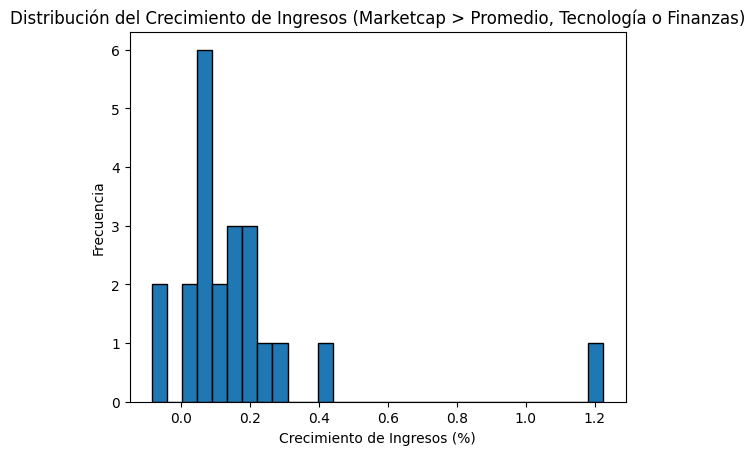

In [43]:
# Calcular el promedio de Marketcap
average_marketcap = df['Marketcap'].mean()

# Filtrar empresas por las condiciones dadas
filtered_df = df[(df['Marketcap'] > average_marketcap) & 
                 (df['Sector'].isin(['Technology', 'Financials']))]

# Histograma del crecimiento de ingresos
plt.hist(filtered_df['Revenuegrowth'].dropna(), bins=30, edgecolor='k')
plt.title('Distribución del Crecimiento de Ingresos (Marketcap > Promedio, Tecnología o Finanzas)')
plt.xlabel('Crecimiento de Ingresos (%)')
plt.ylabel('Frecuencia')
plt.show()


### Pregunta 9: ¿Cuáles son las ciudades con más empresas en el sector energético y con un Marketcap total superior a 50 mil millones?
**Explicación:** Filtramos las empresas del sector energético, agrupamos por ciudad y calculamos el Marketcap total por ciudad, luego seleccionamos aquellas que superan el umbral definido.

In [44]:
# Filtrar empresas del sector energético
energy_companies = df[df['Sector'] == 'Energy']

# Calcular el Marketcap total por ciudad
city_marketcap = energy_companies.groupby('City')['Marketcap'].sum()

# Filtrar ciudades con Marketcap total > 50 mil millones
top_cities = city_marketcap[city_marketcap > 5e10].sort_values(ascending=False)
print(top_cities)


City
Houston      517950160384
Spring       465308188672
San Ramon    254690115584
Tulsa        123676692480
Name: Marketcap, dtype: int64


### Pregunta 10: ¿Cuántas empresas pertenecen a los tres sectores con el Marketcap total más grande, tienen más de 10,000 empleados y están en países distintos a EE.UU.?
**Explicación:** Identificamos los tres sectores con el Marketcap más alto, filtramos empresas con más de 10,000 empleados y ubicadas fuera de EE.UU., y calculamos el total.

In [45]:
# Tres sectores con mayor Marketcap total
top_sectors = df.groupby('Sector')['Marketcap'].sum().nlargest(3).index

# Filtrar empresas con las condiciones dadas
filtered_df = df[(df['Sector'].isin(top_sectors)) & 
                 (df['Fulltimeemployees'] > 10000) & 
                 (df['Country'] != 'United States')]

print(f"Empresas en los tres sectores principales, más de 10,000 empleados y fuera de EE.UU.: {len(filtered_df)}")


Empresas en los tres sectores principales, más de 10,000 empleados y fuera de EE.UU.: 8
